In [1]:
import nibabel as nib
import numpy as np
import tables
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import SimpleITK as sitk
import glob
import scipy.misc
import scipy.stats 

plt.rcParams['image.cmap'] = 'gist_earth'
from PIL import Image

from tf_unet import image_util
from tf_unet import unet
from tf_unet import util
from tf_unet.image_util import ImageDataProvider
from skimage import exposure, img_as_float#, #data


In [2]:
class bggenerator(ImageDataProvider):
    n_class = 3
    channels = 2
    def _load_file(self, path, dtype=np.float32):
        img = nib.load(path)
        data = img.get_data()[...,0,0]
        if dtype == np.float32:
            #print ('in load file: this is data file path: ')
            #print (path)
            data = img_as_float(data)
            data = exposure.equalize_adapthist(data, clip_limit=0.01, nbins=256)
            #print ('in load_file')
            #print(path)
            #print (np.max(data))
            #data = exposure.equalize_hist(data, nbins=4096)        
            #data =data * 4096
        #data = scipy.misc.imresize(data,[472,760], interp='bilinear', mode=None)
        data = np.pad(data,20,'constant')
        data = np.rot90(data)
        
        #used to be [148, 220]
        #print (path)
        #print (type(data))
        #print (data.shape)
        return np.array(data, dtype)   

In [3]:
generator = bggenerator("./data/*/*.hdr",data_suffix="DeepCorT1.hdr",mask_suffix="DeepBinary.hdr",data2_suffix="DeepCorSWIM.hdr")
x_test, y_test = generator(1)

#print ('in here')
#print (generator(2)[1].shape)
#print (generator(2)[0].shape)
#print (np.max(generator(22)[1]))
#print (np.max(generator(22)[0]))
#print(x_test.shape, y_test.shape)


very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:07,650 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:07,656 very large origin values relative to dims; leaving as set, ignoring for affine
E:\Programming_Files\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:07,684 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:07,686 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
201

Number of files entries used: 26


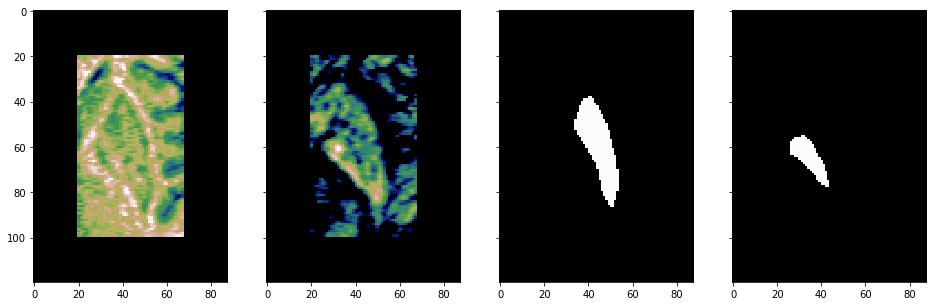

In [4]:
fig, ax = plt.subplots(1,4, sharey=True, figsize=(16,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(x_test[0,...,1], aspect="auto")
ax[2].imshow(y_test[0,...,1], aspect="auto")
ax[3].imshow(y_test[0,...,2], aspect="auto")

In [5]:
#np.histogram([1,2,3,4])
#stats.itemfreq([1,2,3,4])
#img = nib.load('./data/1/DeepCorSWIM.hdr')
#data = img.get_data()[...,0,0]
#print(type(data))
#print(data.shape)
#data2 = np.pad(data,20,'constant')
#data2.shape    
#print(np.min(data))
#print(np.max(data))
#print(type(data))
#plt.imshow(data,aspect = 'auto')
#plt.imshow(data2,aspect = 'auto')
#import os
#img = nib.Nifti1Image(mask, np.eye(4))
#print (mask.dtype)
#print (img.get_data_dtype() == np.dtype(np.float32))
#print (img.header.get_xyzt_units())
#nib.save(img, os.path.join('build','mask3.nii.gz'))

#img = nib.load('./build/mask3.nii.gz')
#print(img.shape)
#data = img.get_data()
#data = img.get_data()[...,0,0]
#plt.imshow(data, aspect = 'auto')





In [6]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=256)

2017-09-25 09:15:08,274 Layers 3, features 256, filter size 3x3, pool size: 2x2


In [7]:
trainer = unet.Trainer(net)#,optimizer = "adam",opt_kwargs = dict(adam=0.01))#, optimizer="adam", opt_kwargs=dict(adam=0.01))

In [8]:
path = trainer.train(generator, "./unet_trained", training_iters=1000, epochs=1000, dropout = 0.5, display_step=500, restore = True)

optimizer: adams
restore
restore ckpt ./unet_trained\model.cpkt
INFO:tensorflow:Restoring parameters from ./unet_trained\model.cpkt


2017-09-25 09:15:13,779 Restoring parameters from ./unet_trained\model.cpkt
2017-09-25 09:15:14,261 Model restored from file: ./unet_trained\model.cpkt
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:14,266 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:14,268 very large origin values relative to dims; leaving as set, ignoring for affine
E:\Programming_Files\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:14,292 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:14,294 very larg

very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:27,907 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:27,907 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:27,939 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:27,942 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:27,966 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 

2017-09-25 09:15:32,431 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:32,459 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:32,462 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:33,057 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:33,060 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:33,084 very large origin values relative to dims; leaving as set, ignorin

very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:37,476 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:37,516 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:37,520 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:37,544 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:37,547 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 

2017-09-25 09:15:41,901 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:41,903 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:42,464 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:42,464 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:42,498 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:42,500 very large origin values relative to dims; leaving as set, ignorin

very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:46,727 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:46,730 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:46,749 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:46,752 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:47,340 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 

2017-09-25 09:15:51,121 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:51,670 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:51,670 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:51,689 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:51,691 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:51,709 very large origin values relative to dims; leaving as set, ignorin

very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:55,939 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:55,958 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:55,961 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:56,535 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:15:56,537 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 

2017-09-25 09:16:00,679 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:00,679 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:00,710 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:00,712 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:00,730 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:00,733 very large origin values relative to dims; leaving as set, ignorin

very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:04,938 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:04,940 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:05,496 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:05,496 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:05,517 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 

2017-09-25 09:16:09,795 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:09,817 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:09,821 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:09,839 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:09,841 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:10,395 very large origin values relative to dims; leaving as set, ignorin

very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:14,064 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:14,621 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:14,624 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:14,641 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:14,643 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 

2017-09-25 09:16:18,807 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:18,810 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:18,826 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:18,829 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:19,364 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:19,364 very large origin values relative to dims; leaving as set, ignorin

very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:23,511 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:23,513 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:23,530 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:23,533 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:16:23,551 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 

KeyboardInterrupt: 

In [ ]:
 x = np.array([1, 2, 3])
type(x)
print (x.shape)
print (x)
a = (x == 1)
print (a)